# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Using visualizing and data analysis techniques, identify which features have impact on the used cars price.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import set_config

set_config(display = "diagram") # this for displaying the pipeline as a diagram

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('data/vehicles.csv')

In [5]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [7]:
# dropping ID and VIN columns since these valuses are unique
df = df.drop(['id', 'VIN'], axis = 1)

In [8]:
# dropping duplicates rows
df = df.drop_duplicates()

In [9]:
# checking the percentage of missing values in each column
(df.isnull().sum() / len(df)) * 100

region           0.000000
price            0.000000
year             0.266152
manufacturer     4.108080
model            1.264087
condition       38.105894
cylinders       40.672128
fuel             0.657822
odometer         0.930182
title_status     1.807728
transmission     0.549580
drive           30.343757
size            71.452904
type            21.277584
paint_color     29.330166
state            0.000000
dtype: float64

In [10]:
# dropping these columns since the percentage of missing values is very high
df = df.drop(['condition', 'cylinders', 'drive', 'size', 'type', 'paint_color'], axis = 1)

In [11]:
df['model'].nunique()

29649

In [12]:
# Dropping the model column since it has so many unique values, therefore it's useless
df = df.drop('model', axis = 1)

In [13]:
(df.isnull().sum() / len(df)) * 100

region          0.000000
price           0.000000
year            0.266152
manufacturer    4.108080
fuel            0.657822
odometer        0.930182
title_status    1.807728
transmission    0.549580
state           0.000000
dtype: float64

In [14]:
# dropping the rows that have nmissing values since their percentage is low
df = df.dropna()

In [15]:
df.head()

,region,price,year,manufacturer,fuel,odometer,title_status,transmission,state
27,auburn,33590,2014.0,gmc,gas,57923.0,clean,other,al
28,auburn,22590,2010.0,chevrolet,gas,71229.0,clean,other,al
29,auburn,39590,2020.0,chevrolet,gas,19160.0,clean,other,al
30,auburn,30990,2017.0,toyota,gas,41124.0,clean,other,al
31,auburn,15000,2013.0,ford,gas,128000.0,clean,automatic,al


In [16]:
df.describe()

,price,year,odometer
count,3.436680e+05,343668.000000,3.436680e+05
mean,8.863652e+04,2011.316599,9.578976e+04
std,1.357389e+07,9.328081,1.975584e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,6.000000e+03,2008.000000,3.584100e+04
50%,1.450000e+04,2014.000000,8.371000e+04
75%,2.699000e+04,2017.000000,1.332020e+05
max,3.736929e+09,2022.000000,1.000000e+07


<Figure size 720x360 with 0 Axes>

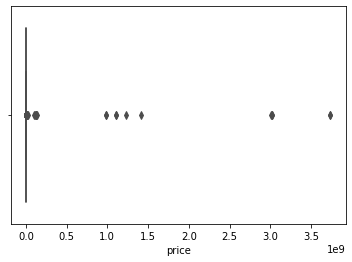

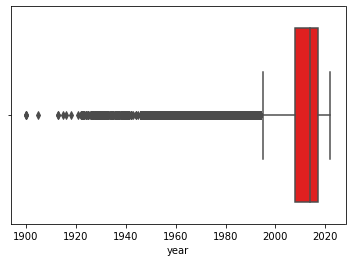

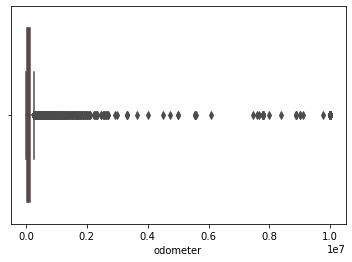

In [17]:
numeric_cols = ['price', 'year', 'odometer']
plt.figure(figsize = (10,5))
for i in numeric_cols:
    plt.subplots()
    sns.boxplot(data = df, x = i, color = 'red')
plt.show()

In [18]:
# Removing outliers from Price
df = df.drop(df[df['price'] > 60000].index, axis = 0)

In [19]:
# Removing outliers from Odometer
df = df.drop(df[df['odometer'] > 300000].index, axis = 0)

In [20]:
# Removing outliers from Year
df = df.drop(df[df['year'] < 1980].index, axis = 0)

<Figure size 720x360 with 0 Axes>

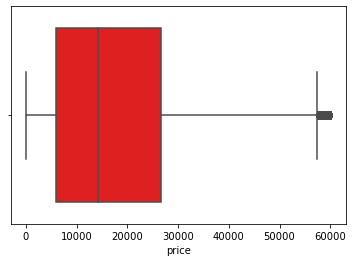

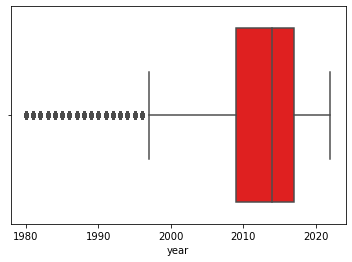

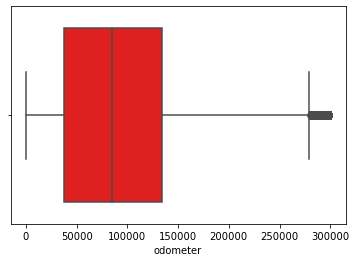

In [21]:
numeric_cols = ['price', 'year', 'odometer']
plt.figure(figsize = (10,5))
for i in numeric_cols:
    plt.subplots()
    sns.boxplot(data = df, x = i, color = 'red')
plt.show()

In [22]:
df['price'].describe()

count    331122.000000
mean      17077.535821
std       13370.433951
min           0.000000
25%        5999.000000
50%       14191.500000
75%       26590.000000
max       60000.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

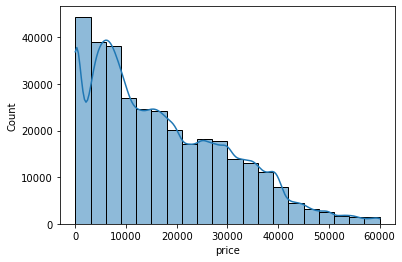

In [23]:
sns.histplot(data = df, x = df['price'], bins = 20, kde = True)

In [24]:
df['year'].describe()

count    331122.000000
mean       2012.186708
std           6.359169
min        1980.000000
25%        2009.000000
50%        2014.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64

<AxesSubplot:xlabel='year', ylabel='Count'>

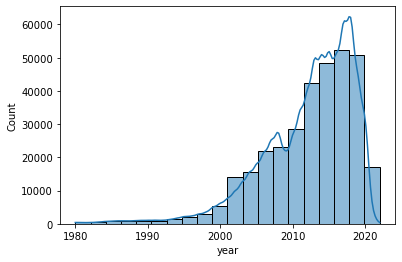

In [25]:
sns.histplot(data = df, x = df['year'], bins = 20, kde = True)

In [26]:
df['odometer'].describe()

count    331122.000000
mean      90995.511902
std       61898.081471
min           0.000000
25%       37073.000000
50%       85030.000000
75%      134000.000000
max      300000.000000
Name: odometer, dtype: float64

<AxesSubplot:xlabel='odometer', ylabel='Count'>

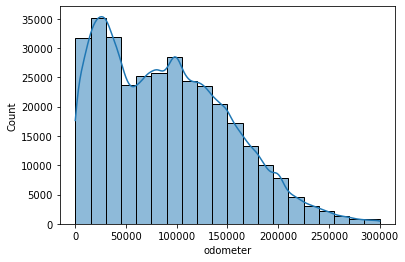

In [27]:
sns.histplot(data = df, x = df['odometer'], bins = 20, kde = True)

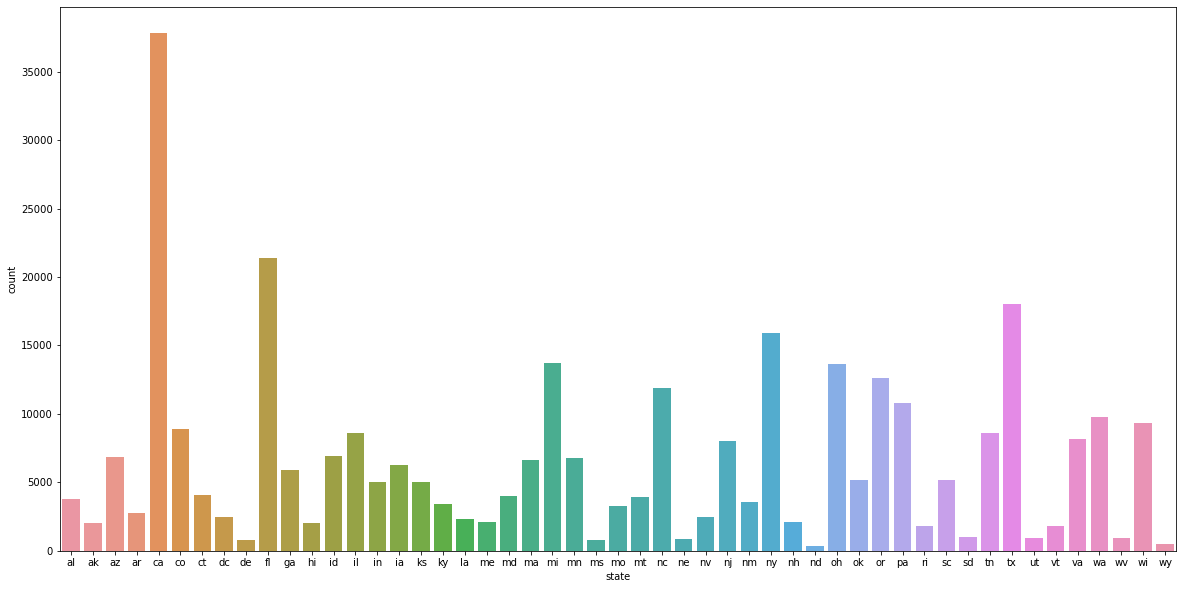

In [28]:
plt.figure(figsize = (20,10))
sns.countplot(data = df , x = df['state'])
plt.show()

In [29]:
df['manufacturer'].value_counts()

ford               55599
chevrolet          42845
toyota             28216
honda              17679
nissan             15352
jeep               15310
ram                14441
gmc                13350
bmw                12600
dodge              10558
mercedes-benz       9608
hyundai             8272
subaru              8038
volkswagen          7903
lexus               7028
kia                 6844
audi                6540
cadillac            5593
acura               5416
chrysler            4903
mazda               4603
buick               4559
infiniti            4289
lincoln             3573
volvo               2766
mitsubishi          2760
mini                2038
jaguar              1791
pontiac             1704
rover               1695
porsche             1025
saturn               936
mercury              865
alfa-romeo           833
tesla                735
fiat                 671
harley-davidson      114
datsun                22
ferrari               19
land rover            15


In [30]:
df['fuel'].value_counts()

gas         279756
other        26118
diesel       19349
hybrid        4476
electric      1423
Name: fuel, dtype: int64

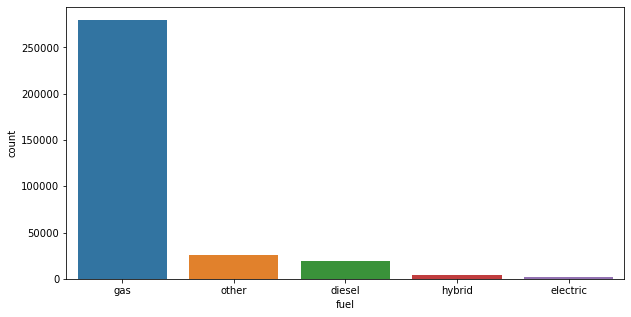

In [31]:
plt.figure(figsize = (10,5))
sns.countplot(data = df , x = df['fuel'])
plt.show()

In [32]:
df['title_status'].value_counts()

clean         319782
rebuilt         6352
salvage         3304
lien            1260
missing          314
parts only       110
Name: title_status, dtype: int64

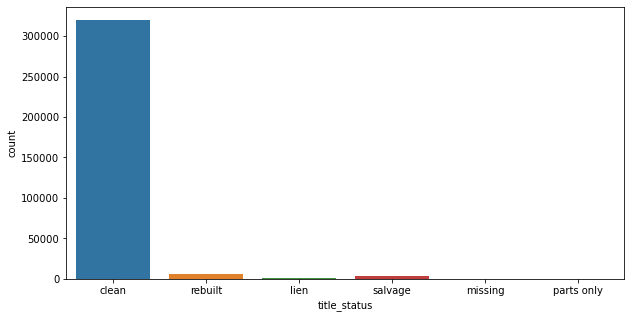

In [33]:
plt.figure(figsize = (10,5))
sns.countplot(data = df , x = df['title_status'])
plt.show()

In [34]:
df['transmission'].value_counts()

automatic    256332
other         58185
manual        16605
Name: transmission, dtype: int64

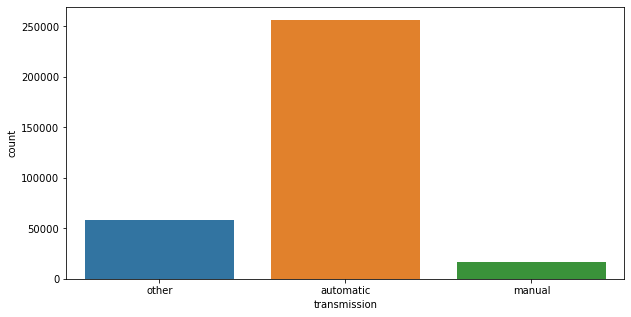

In [35]:
plt.figure(figsize = (10,5))
sns.countplot(data = df , x = df['transmission'])
plt.show()

In [36]:
df['region'].value_counts()

minneapolis / st paul    2679
portland                 2611
sacramento               2604
columbus                 2598
denver                   2588
                         ... 
meridian                   21
southwest MS               12
kansas city                 8
fort smith, AR              8
west virginia (old)         7
Name: region, Length: 404, dtype: int64

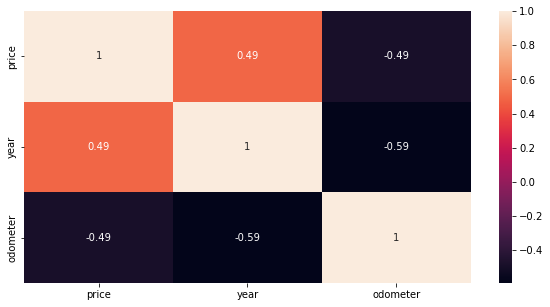

In [37]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True)
plt.show()

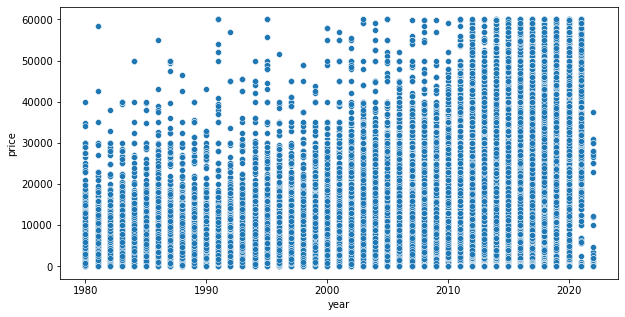

In [38]:
plt.figure(figsize = (10,5))
sns.scatterplot(data= df, x = 'year', y = 'price')
plt.show()

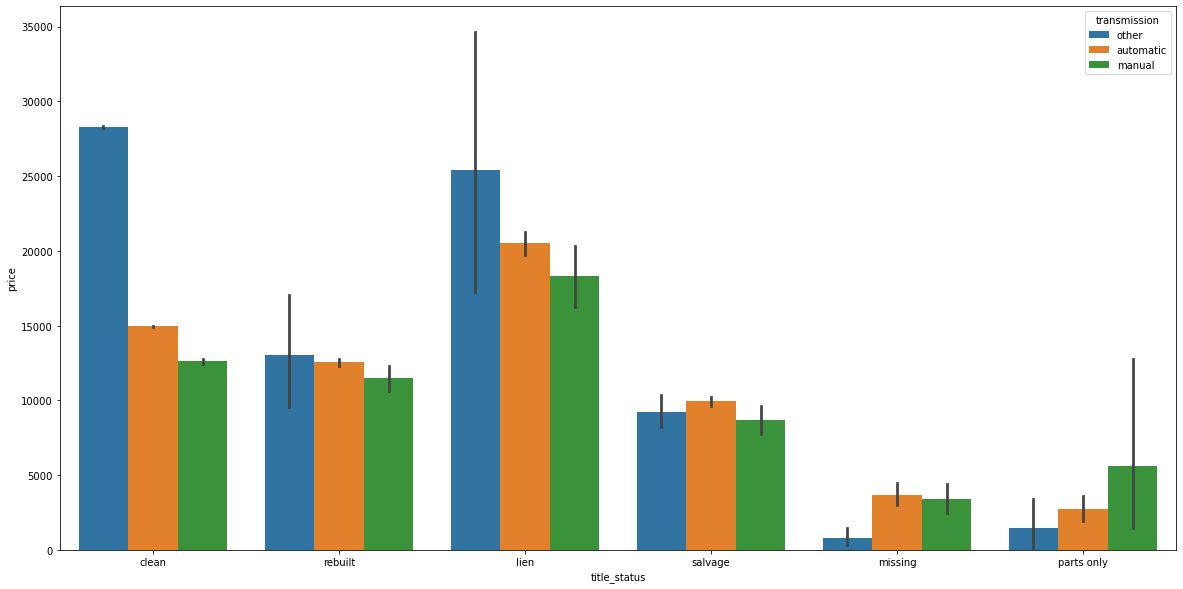

In [39]:
plt.figure(figsize = (20,10))
sns.barplot(data = df, x = 'title_status', y = 'price', hue = 'transmission')
plt.show()

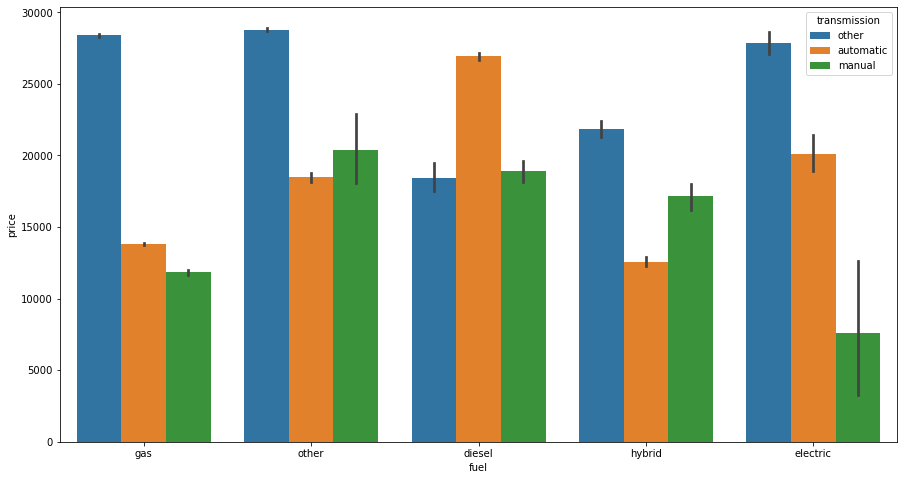

In [40]:
plt.figure(figsize = (15,8))
sns.barplot(data = df, x = 'fuel', y = 'price', hue = 'transmission')
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [41]:
# Splitting the features to numeric and categorial features
num_features = list(df.select_dtypes('number'))
num_features.remove('price')

cat_features = list(df.select_dtypes('object'))
print(f'The numeric features are:  {num_features}')
print(f'The categorical features are:  {cat_features}')

The numeric features are:  ['year', 'odometer']
The categorical features are:  ['region', 'manufacturer', 'fuel', 'title_status', 'transmission', 'state']


In [42]:
X = df.drop(['price'], axis = 1)
y = df['price']

In [43]:
# Splitting the dataset to training and test sets

X[cat_features] = X[cat_features].apply(LabelEncoder().fit_transform)


X_df = pd.DataFrame(X)

X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size = 0.3, random_state = 42)
X_train.shape

(231785, 8)

In [44]:
lr = LinearRegression()

lr.fit(X_train, y_train)

preds = lr.predict(X_train)

mse = mean_squared_error(y_train, preds)
print(mse)
print(r2_score(y_train, preds)*100)

115570099.54540886
35.28044446718119


In [45]:
cross_score = cross_val_score(lr, X_train, y_train, scoring = 'r2', cv = 4)
cross_score

array([0.35370429, 0.3541463 , 0.35034789, 0.35268622])

In [46]:
ridge = Ridge(alpha = 0.5)

ridge.fit(X_train, y_train)

preds = ridge.predict(X_train)

mse = mean_squared_error(y_train, preds)
print(mse)
print(r2_score(y_train, preds)*100)

115570099.54564944
35.28044446704648


In [47]:
cross_score = cross_val_score(ridge, X_train, y_train, scoring = 'r2', cv = 4)
cross_score

array([0.35370427, 0.35414631, 0.35034787, 0.35268624])

In [48]:
lasso = Lasso(alpha = 1)

lasso.fit(X_train, y_train)

preds = lasso.predict(X_train)

mse = mean_squared_error(y_train, preds)
print(mse)
print(r2_score(y_train, preds)*100)

115570106.20418705
35.280440738248146


In [49]:
cross_score = cross_val_score(lasso, X_train, y_train, scoring = 'r2', cv = 4)
cross_score

array([0.35370224, 0.35414748, 0.35034574, 0.35268905])

In [50]:
ohe_transformer = make_column_transformer((OneHotEncoder(sparse = False, drop = 'if_binary'), cat_features),
                                              (StandardScaler(), num_features))

In [51]:
X_transformed = ohe_transformer.fit_transform(X)

X_df = pd.DataFrame(X_transformed)

X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size = 0.3, random_state = 42)
X_train.shape

(231785, 513)

In [52]:
lr = LinearRegression()

lr.fit(X_train, y_train)

preds = lr.predict(X_train)

mse = mean_squared_error(y_train, preds)
print(mse)
print(r2_score(y_train, preds)*100)

94614909.2870505
47.015405369362796


In [53]:
ridge = Ridge(alpha = 0.5)

ridge.fit(X_train, y_train)

preds = ridge.predict(X_train)

mse = mean_squared_error(y_train, preds)
print(mse)
print(r2_score(y_train, preds)*100)

94599679.41716741
47.02393413600341


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

We had multiple columns that have high percentage of missing values. We might need to search more on how we can fix this.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

We found that the car year has the most impact on the price.
While the car odometer has negative impact on the price. That means as the odometer increase, the price decrease.